# Booking.com Data Job Analysis


### Introduction

>**We rely on AI to analyse your CV and enrich it with market data to get a well rounded skill set overview. Consequently, your skills will be matched with the best available career opportunity.**

### Project Objective


### Methodology
- Reading in raw data from web scraper
- Cleaning up data / string manipulation
- Exploratory Analysis to understand data
- Delving into specifics to answer key questions

* In order to create a concise overview of the relevant data, I will opt for creating topic specific dataframes


# Imports

In [93]:
#Imports
import numpy as np
import pandas as pd

#Settings for string legibility
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_colwidth', -1)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#String manipulations
import re, string
from collections import Counter

#Visualizations
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.colors
import seaborn as sns
import itertools

#Plot output
%matplotlib inline
plt.rcParams['figure.figsize'] = [20,16]
plt.rcParams['figure.dpi'] = 300
%config InlineBackend.figure_format = 'svg'

#Booking.com colorscheme RGBA
blue_d = np.array([0/256, 53/256, 128/256, 1])
blue_l = np.array([0/256, 159/256, 227/256, 1])
yellow = np.array([254/256, 186/256, 2/256, 1])
grey = np.array([102/256, 102/256, 102/256, 1])
white = np.array([242/256, 246/256, 250/256, 1])

#Booking.com colormaps
cmap3 = ListedColormap([blue_d,blue_l,yellow])
cmap4 = ListedColormap([blue_d,blue_l,yellow,grey])
cmap5 = ListedColormap([blue_d,blue_l,yellow,grey,white])

#Booking.com colorpalette Seaborn
c = ['#003580', '#009fe3', '#feba02', '#666', '#f2f6fa']
sns.set_theme('whitegrid')
#sns.set(rc={'axes.facecolor':'#f2f6fa', 'figure.facecolor':'#f2f6fa'})
sns.set_palette(sns.color_palette(c))

#Wordcloud
from wordcloud import WordCloud
from nltk.corpus import stopwords

#Quality of life
import warnings
warnings.filterwarnings('ignore')

ValueError: context must be in paper, notebook, talk, poster

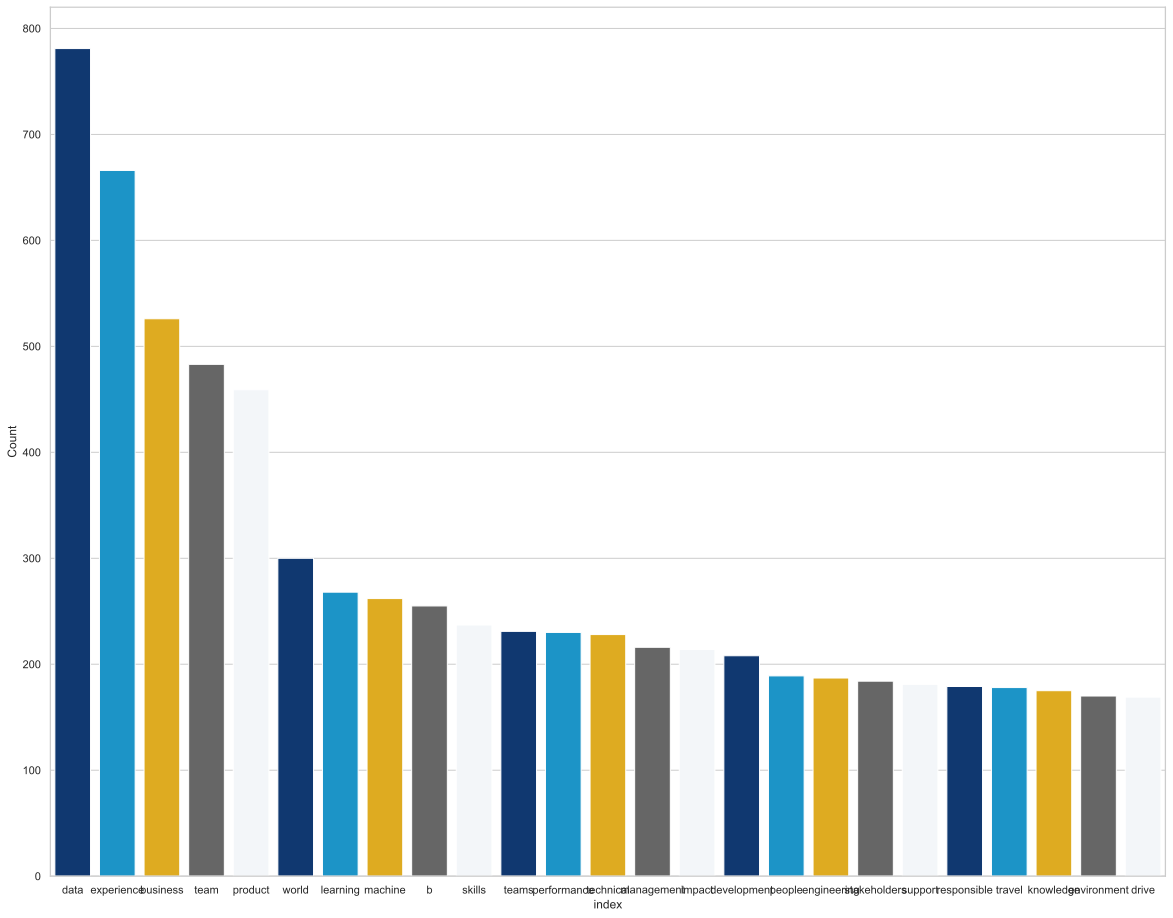

In [94]:
sns.barplot(data=words_all_jobs[:25],x='index',y='Count',palette=c);

# Data

The raw data received from the web scraper requires a bit of tidying up. Apart from the Job Title the dataframe consists mainly of long strings that needs to be made legible within the scope of this project.

In [2]:
df = pd.read_csv('Booking_Jobs.csv')

In [3]:
print('Dataframe shape: ', df.shape)
df.head()

Dataframe shape:  (108, 2)


Job Title  \
0  Data Engineer                                                        
1  Manager Data Science Insights - Content Agency                       
2  Senior Data Engineering Manager - Data & Machine Learning Platform   
3  Senior Data Engineer - Data & Machine Learning Platform              
4  Data Analyst Trip Foundations                                        

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [4]:
df.info() #No missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Job Title        108 non-null    object
 1   Job Description  108 non-null    object
dtypes: object(2)
memory usage: 1.8+ KB


In [5]:
job_listings = df['Job Title'].count()
job_listings

108

# String Manipulation

We'll start by adding all data-related job descriptions together to find the most commonly used words on the Booking.com career site. Doing this will allow us to gain insight into what words the company uses to describe itself, their values, and what they seek in future employees. To get a more accurate reprentation of which key words matter most we'll filter out common stopwords. Though there are many libraries that provide lists of stopwords on various languages, we'll need to add a few more words that are specific to this platform.

But firstly, we have to define a list of **stopwords**. These are words that often appear in sentences, but offer little value in understanding its meaning. We can use this list of omit stopwords, leaving us with the key words we're after.

The process will look as follows:
>1. Defining stopwords
>2. Combining all job descriptions
>3. Cleaning our string
>4. Transforming string into a dictionary of counted words 
>5. Ranking our words
>6. Filtering out stopwords
>7. Creating a dataframe

### Step 1. Defining Stopwords

In [6]:
stopwords = sorted(stopwords.words('english')) #Using the Natural Language Toolkit (NLTK) library
stopwords_booking = ['booking','com', 'booking.com', 'bookingcom', 'part', 'right', 'make', 'work', 'working', #Adding platform specific words
                     'need', 'e','g', 'eg', '&','within', 'well', '-', '.', 'including', 'high', 'role', 'relevant', 
                     'strong', 'key','one', 'year', 'years', 'looking', 'everyone', 'easier', 'sexual', 'we\'re', 'etc',
                     'orientation','best', 'company', 'B', 'application', 'equal', 'opportunity', 'national', 'world'
                     'origin', 'across', 'able', 'genetic', 'disability', 'new', 'gender', 'identity', 'level']
stopwords.extend(stopwords_booking) #Combining both into a stopwords list

### Step 2. Combining all Job Descriptions

In [7]:
descriptions = ''.join(d for d in df['Job Description']) #looping over all cells in Job Description column and joining then together
print ("There are {} words in the combined data-related job descriptions.".format(len(descriptions))) #Printing results

There are 549164 words in the combined data-related job descriptions.


### Step 3. Cleaning string

In [8]:
descriptions = descriptions.lower() #Lowering string to remove capitalization and make comparing words possible
descriptions = re.sub('\\\\n',' ', descriptions) #Replace '\n' with a space - removing newline to seperate words
descriptions = re.sub('\W+',' ', descriptions) #Replace all puntualtion with a space - creating a (mostly) clean list of words
print ("There are {} words in the description after removing stopwords.".format(len(descriptions))) #Printing results

There are 537700 words in the description after removing stopwords.


### Step 4. Transforming string into a dictionary of counted words

In [9]:
word_count = dict(Counter(descriptions.split())) #Creating a dictionary of all words in split description
print('Without ranking the first 10 words look like: {}'.format(dict(itertools.islice(word_count.items(), 10))))

Without ranking the first 10 words look like: {'data': 781, 'engineer': 9, 'enablement': 6, 'about': 87, 'the': 2960, 'company': 156, 'not': 54, 'long': 77, 'ago': 28, 'booking': 643}


### Step 5. Ranking our words

In [10]:
words_popular = {k: v for k, v in sorted(word_count.items(), key=lambda item: item[1], reverse=True)} #Creating dictionary by most popular words by looping over our split descriptions dictionary
print('With ranking the first 10 words look like: {}'.format(dict(itertools.islice(words_popular.items(), 10))))

With ranking the first 10 words look like: {'and': 4873, 'the': 2960, 'to': 2781, 'of': 2044, 'a': 1428, 'in': 1328, 'with': 1035, 'for': 958, 'data': 781, 'our': 706}


### Step 6.  Filtering out stopwords

In [11]:
words_nonstop = [w for w in words_popular if w not in stopwords] #Creating dictionary of only stopword-excluded words to compare to
words_popular_nonstop = {k: words_popular[k] for k in words_nonstop if k in words_popular} #Looping over our stopword-excluded dictionary and comparing with ranked dictionary to extract word and frequency
print('The top 10 most frequently used words with stopwords looks like: {}'.format(dict(itertools.islice(words_popular_nonstop.items(), 10))))

The top 10 most frequently used words with stopwords looks like: {'data': 781, 'experience': 666, 'business': 526, 'team': 483, 'product': 459, 'world': 300, 'learning': 268, 'machine': 262, 'b': 255, 'skills': 237}


### Step 7. Creating DataFrame

In [12]:
words_all_jobs = pd.DataFrame.from_dict(words_popular_nonstop, orient='index',columns=['Count']).reset_index() #(5) Create our cleaned dataframe
words_all_jobs

index  Count
0     data        781  
1     experience  666  
2     business    526  
3     team        483  
4     product     459  
...       ...     ...  
3746  attractive  1    
3747  parter      1    
3748  expansion   1    
3749  cold        1    
3750  calling     1    

[3751 rows x 2 columns]

# Exploratory Analysis

One way to make this intuitively insightful is to use a wordcloud, which displays the most common words in a visual manner. The size of each word corresponds to the frequency of its use.

In [56]:
wordcloud = WordCloud(min_font_size=8, max_font_size=100, max_words=500, width=800, height=400,prefer_horizontal=1, background_color='#f2f6fa').generate_from_frequencies(words_popular_nonstop) #Generate wordcloud class from dictionary

In [57]:
plt.imshow(wordcloud.recolor(colormap=ListedColormap(colorarray)), interpolation='bilinear')
plt.axis("off")
plt.show();

### Wordcloud - what did we learn?

Having included ALL data-related jobs, we can only spot general trends - our findings match that match of a(ny) data-driven company.

A few words pop out immediately (Data, Experience, Business, Team, Product), so it's worth paying closer attention to the 'secondary' words as well.

- **(Machine) Learning**: A general machine learning trend?
    - Treating these as seperate words loses out on possible overlap and will require further research
    - Correlation? Machine is often found in combination with Intelligence, Learning often turns up before Models and Code.
    - Overall, 'Machine' hints at strong ML-focus since it's a word rarely used outside of this context (in job positions).
    - Representation - How many jobs are ML-related and how much does this skew our vision of general Booking.com jobs descriptions?


- **World**: as one of the world’s leading digital travel companies this emphasizes their global presence and state of mind.

- **Empowerment**: we see a high frequency of words aligning with Booking.com values like: Vision, Development, Identify, Impact, and Ownership.

### Bar Chart

Wordclouds are great for getting a sense of what's important, but ranking the top 20 most relevant words becomes more difficult. That's why we use a bar chart to accurately rank and communicate our findings.

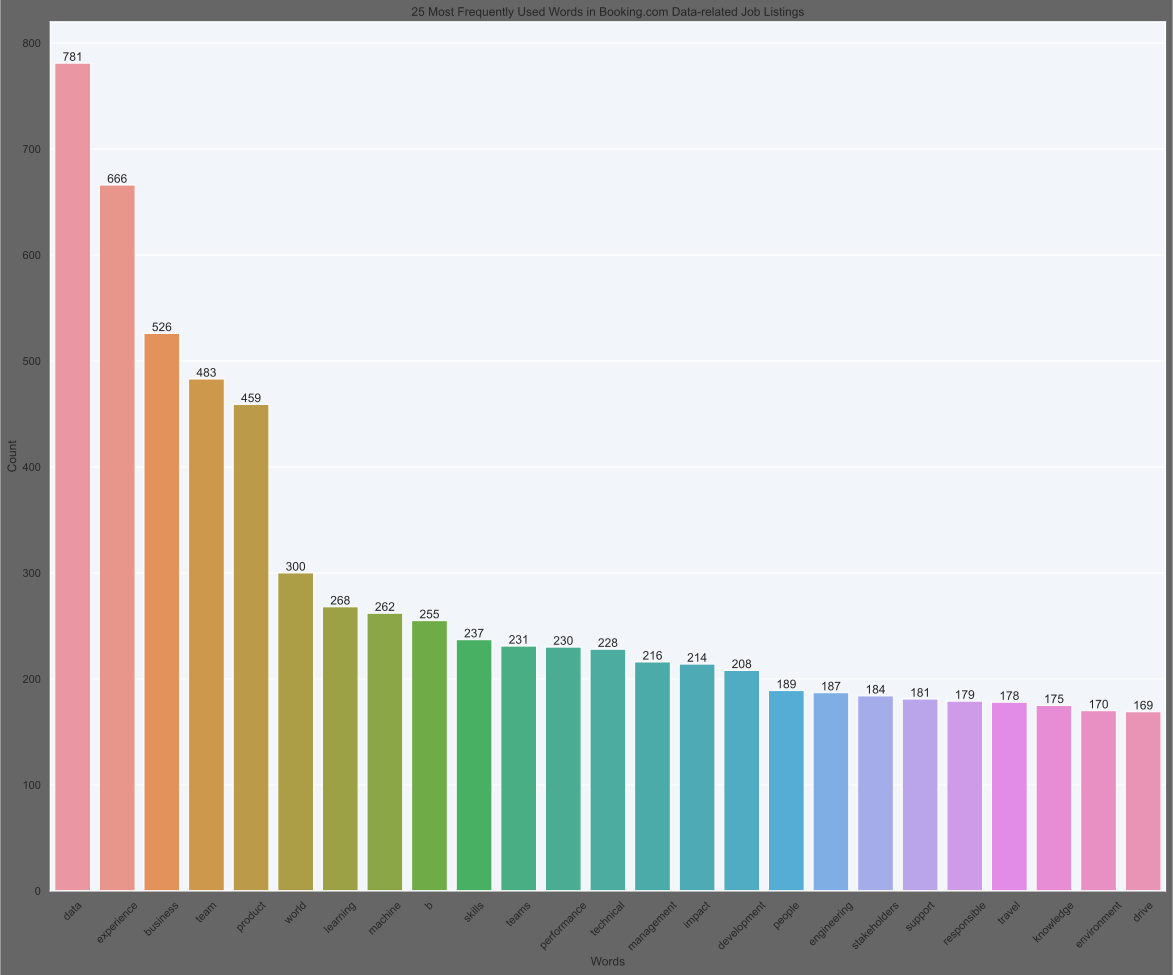

In [61]:
ax = sns.barplot(data=words_all_jobs[:25],x='index',y='Count')
ax.bar_label(ax.containers[0])
plt.xticks(rotation= 45)
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('25 Most Frequently Used Words in Booking.com Data-related Job Listings');

**Q:** How big a percentage of all words used is a Top 5 Word?

In [16]:
print('A: {}'.format(words_all_jobs['Count'][5:].sum()/words_all_jobs['Count'][:5].sum()))

A: 14.945454545454545


Let's calculate the ratio of each of these words per job listing.

In [17]:
words_all_jobs['Ratio_Listings']= words_all_jobs['Count']/job_listings #Creating new column for ratios
words_all_jobs

index  Count  Ratio_Listings
0     data        781    7.231481      
1     experience  666    6.166667      
2     business    526    4.870370      
3     team        483    4.472222      
4     product     459    4.250000      
...       ...     ...         ...      
3746  attractive  1      0.009259      
3747  parter      1      0.009259      
3748  expansion   1      0.009259      
3749  cold        1      0.009259      
3750  calling     1      0.009259      

[3751 rows x 3 columns]

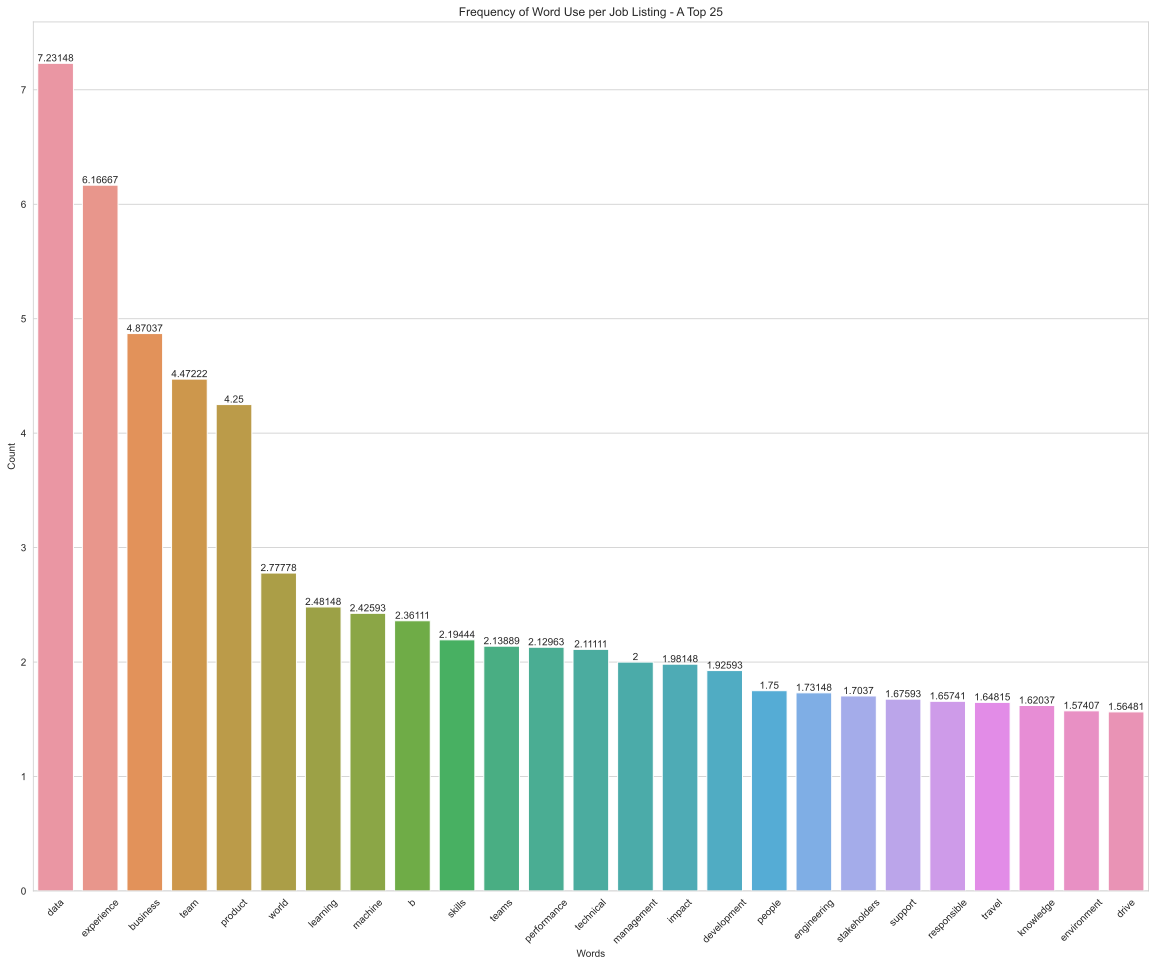

In [18]:
ax = sns.barplot(data=words_all_jobs[:25],x='index',y='Ratio_Listings')
ax.bar_label(ax.containers[0])
plt.xticks(rotation= 45)
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('Frequency of Word Use per Job Listing - A Top 25');

In [19]:
words_all_jobs['Ratio_Listings'][0]/words_all_jobs['Ratio_Listings'][5] #Ratio DATA to WORLD

2.6033333333333335

In [20]:
words_all_jobs['Ratio_Listings'][4]/words_all_jobs['Ratio_Listings'][5] #Ratio BUSINESS to WORLD

1.53

### Bar chart - what did we learn?

- Top 5 hegemony:
    - The differences between the 5 most used words and the rest is substatial, **15%** of all words* used is 'Data', 'Experience', 'Business', 'Team' or 'Product'
    - 'Data' is at least **2.8 times** more frequenty than words outside of the top 5
    - 'Product' is at least **1.5 times more** more likely to get used than any word outside the top 5
    - 'Data' and 'Experience' are all used **over 6 times** per job listing
    
***    
\* _'all words' refers to the cleaned word list, excluding all stopwords. This means the percentages do not represent an absolute, but rather relative number._

## Job Titles

Now let's focus on the Job Titles to further out understanding of roles within Booking.com.

In [21]:
df['Job Title'].nunique()==df['Job Title'].count()

True

The number of unique Job Titles and number of Job Titles is the same, meaning that we have to try a bit harder if we want to apply categorization.

In [22]:
df['Job Title'].sample(25)

28     Machine Learning Scientist - Metasearch                 
20     Director of Trips Data Engineering                      
103    Payroll Specialist                                      
81     Software Developer - Partner Fraud                      
100    Engineering Manager - Apps                              
47     SEO Specialist                                          
66     Manager, Strategy & Operations - Horizontal Product     
55     Director of Product DMLP                                
88     Group Product Manager - B2B Partnerships Platform       
86     Finance Analyst, FP&A - Group & Finance                 
6      Data Engineer - Data & Machine Learning Platform        
11     Data Product Manager, Marketing Data                    
23     Manager Data Science Insights - Flights                 
51     Senior Machine Learning Engineer - Content Agency       
36     SEO Strategist                                          
7      Data Scientist Insights - App Mar

In [23]:
df.head(1)

Job Title  \
0  Data Engineer   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [24]:
'''def wordCleaner(job_title):
    df_titles.loc[job_title] #Combining similar words to create fair comparison
    repl = {'teams': 'team', 'world.': 'world', 'products': 'product'} #list of replacements
    repl = dict((re.escape(k), v) for k, v in repl.items()) 
    pattern = re.compile('|'.join(repl.keys()))
    x = pattern.sub(lambda m: repl[re.escape(m.group(0))], x)'''

"def wordCleaner(job_title):\n    df_titles.loc[job_title] #Combining similar words to create fair comparison\n    repl = {'teams': 'team', 'world.': 'world', 'products': 'product'} #list of replacements\n    repl = dict((re.escape(k), v) for k, v in repl.items()) \n    pattern = re.compile('|'.join(repl.keys()))\n    x = pattern.sub(lambda m: repl[re.escape(m.group(0))], x)"

Create a new Dataframe with Job Titles as index. This way, we can locate job descriptions based on job titles.

In [25]:
df_titles = df.copy()
df_titles.set_index('Job Title',inplace=True)

In [26]:
replacements = {'teams': 'team', #Create dictionary of words and their replacements
                'products': 'product'}
#replacements = dict((re.escape(k), v) for k, v in replacements.items()) #Creating dictionary with regular expression metacharacters (allowing to fitler words like 'world.')

In [27]:
replacements

{'teams': 'team', 'products': 'product'}

# Function Extracting cleaned DF from Job Title

In [28]:
#job_title = 'Data Engineer'

In [29]:
def wordRanker(job_title):
    description = str(df_titles.loc[job_title]).lower() #Create string of lower words from Job Title column at Index of Job Title
    description = re.sub('\\\\n',' ', description) #Replace '\n' with a space - removing newline to seperate words
    description = re.sub('\W+',' ', description) #Replace all puntualtion with a space - creating a (mostly) clean list of words
    word_count = dict(Counter(description.split())) #(1/2) Creating a dictionary of all words in split description
    words_popular = {k: v for k, v in sorted(word_count.items(), key=lambda item: item[1], reverse=True)} #(3) Sorting dictionary by most popular words
    words_nonstop = [w for w in words_popular if w not in stopwords] #(4) Drop all words that appear in both words_popular AND stopwords
    words_popular_nonstop = {k: words_popular[k] for k in words_nonstop if k in words_popular}
    words_all_jobs = pd.DataFrame.from_dict(words_popular_nonstop, orient='index',columns=['Count']).reset_index() #(5) Create our cleaned dataframe
    return words_all_jobs

wordRanker('Global Senior Operational Excellence Specialist - Content Agency')

index  Count
0    process      13   
1    operational  10   
2    improvement  7    
3    teams        7    
4    content      6    
..       ...     ..    
263  allows       1    
264  thrive       1    
265  name         1    
266  dtype        1    
267  object       1    

[268 rows x 2 columns]